In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
class map:
    def __init__(self,x_size,y_size):
        self.x_size = x_size
        self.y_size = y_size
        self.map_grid = np.full((y_size,x_size),255)
        return
    
    def show_map(self):
        plt.imshow(self.map_grid,cmap='gray')
        plt.show()
        
    def add_landmark(self,land_id,xpos,ypos,size,sym):stat
        self.map_grid[ypos-size:ypos+size,xpos-size:xpos+size] = land_id*np.ones((2*size,2*size))
        if(sym == 'x'):
            sym_x = xpos
            sym_y = self.y_size - ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))
            
        if(sym == 'y'):
            sym_x = self.x_size - xpos
            sym_y = ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))
        
        if(sym == 'xy'):
            sym_x = self.x_size - xpos
            sym_y = self.y_size - ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))
            self.add_landmark(land_id,xpos,ypos,size,'x')
            self.add_landmark(land_id,xpos,ypos,size,'y')
        
            
        return
    
    def add_rect(self,x_c,y_c,length,width,sym,rect_id = 0 ):
        self.map_grid[int(y_c - length/2):int(y_c+ length/2),int(x_c-width/2):int(x_c+ width/2)] = rect_id*np.ones((length,width))
        if(sym == 'x'):
            
        
        return
        
    
    def read_from_file(self,path):
        with open(path) as fp:
            for count,line in enumerate(fp):
                obst = []
                print(line)
                for word in line.split():
                    obst.append(word)
                    
                self.add_landmark(int(obst[0]),int(obst[1]),int(obst[2]),int(obst[3]),obst[4])
                
    def add_rooms(self):
        obst_val = 0

        quat_dim = 500
        map1 = np.ones((quat_dim, quat_dim)) * 255

        border_width = 20

        # Add border
        map1[0:border_width] = obst_val
        map1[:,0:border_width] = obst_val

        partition_width = 40 # must be even 
        partition_height = 350

        map1[int(quat_dim-(partition_width/2)):quat_dim, 0:partition_height] = obst_val
        map1[0:partition_height, int(quat_dim-(partition_width/2)):quat_dim] = obst_val

        room_wall_width = 20 # must be even 
        room_height = 300
        door_size = 120

        map1[int(room_height-(room_wall_width/2)):int(room_height+(room_wall_width/2)), 0:int(room_height+(room_wall_width/2))] = obst_val
        map1[door_size:int(room_height+(room_wall_width/2)), int(room_height-(room_wall_width/2)):int(room_height+(room_wall_width/2))] = obst_val

        # Rotate 90
        map_90 = np.rot90(map1)

        # Rotate 180 
        map_180 = np.rot90(map1, 2)

        # Rotate 270 
        map_270 = np.rot90(map1, 3)

        map_temp1 = np.append(map1, map_270, axis=1)
        map_temp2 = np.append(map_90, map_180, axis = 1)

        map1 = np.append(map_temp1, map_temp2, axis = 0)
        self.map_grid = map1

        return
                    
                    

In [125]:
file_path = "add_map.txt"


1 200 300 10 xy

2 220 300 10 xy

3 240 300 10 xy



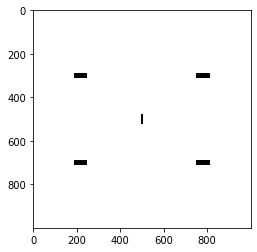

In [126]:
le_map = map(1000,1000);
# le_map.add_rooms()
le_map.add_rect(500,500,50,10)
le_map.read_from_file("add_map.txt")
le_map.show_map()

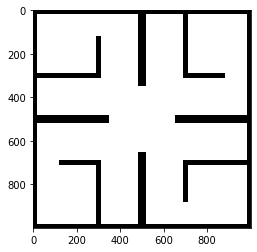